# Data Story: Exploring Telco's Customer Churn & Retention 
Telco is a telecommunications company that offers a myriad of base and bonus packages surrounding their phone and Internet services.  With the increasing competitive offerings from other smartphone and streaming service providers contributing to the growing industry cord-cutting and churn, Telco is interested in better serving and retaining its current and churned customers by understanding their account activity, demogrpahic profiles and services purchased.  

With such information the telcom provider expects to predict the customer behaviors and/or characteristics that leads to churn and thus proactively work to put in place customer programs and packages that will better retain and upsale more current & future customers amidst the growing competitive marketplace.

However, before moving forward with implementing any changes to improve customer churn and retention, Telco would like to be informed of the following:
+ What is their latest customer churn and retention composition?
+ Are their most or least tenured customers leaving or both?
+ To what extent was Telco's revenue impacted from churned customers?
+ Is there a particular demographic profile or characteristics that likely leads to churn?

# Load the cleaned dataset 
Before starting any exploratory analysis, we will load the previous notebook in which Telco's data was wrangled and cleaned for ease of use.

In this dataset, the following customer information was provided and defined by the telecom provider:

+ __Demographic info about customers:__ gender, age range, and if they have partners and dependents
+ __Services purchased:__ phone, multiple lines, Internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ __Customer account information:__ how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
+ __Churn:__ customers who left within the last month

In [1]:
# Load clean and data-wrangled dataset from previous notebook
%run '/Users/sergiogutierrez/Springboard_projects/Capstone 1/Telco Data Science Capstone Project.ipynb'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [2]:
# Check DataFrame with categorical binary columns
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [3]:
# Load visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_palette('Set2')

# What is their latest customer churn and retention composition?
Based on the customer composition pie chart below, Telco lost a little over a quarter of its customer base, which amounted to 26.5% (or approximately to 1,900) of its total customers.  This appears to be a substantial amount of lost customers but we also need to assess the importance of these lost customers as it relates to their revenue contribution, tenure (or years) with the provider and the extent to which their churn in the industry is within the norm.

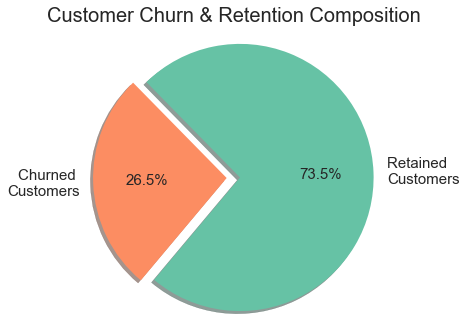

In [4]:
churn_rate = df.Churn_Yes.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(churn_rate, labels=('Retained \nCustomers', 'Churned \nCustomers'), textprops={'fontsize': 15}, 
        autopct='%1.1f%%', shadow=True, explode=(0, 0.1), startangle=230)

ax1.set_title("Customer Churn & Retention Composition", size=20)
ax1.axis('equal')

plt.show()

# To what extent was Telco's revenue impacted from churned customers?
As we look to evaluate the revenue contribution from churned customers, the breakdown below illustrates that its churned customers comprise of 18% (or close to 2.9 million dollars) of its total revenue, while its retained customers contribute the remaining 82% (or 13.2 million dollars) of the company's revenue.  While Telco's churned customers comprise of 26.5% of total customers, the telecom provider's revenue losses from them are not equally impacted since their revenue contribution percentage is less than their customer composition percentage.

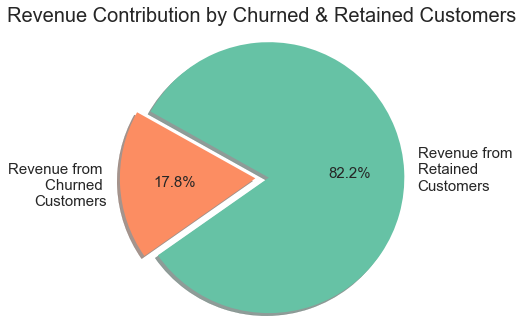

avg churned customer total charge per year = 1531.8
avg retained customer total charge per year = 2555.34


In [5]:
churned_revenue = df.loc[df.Churn_Yes==1, 'TotalCharges']
retained_revenue = df.loc[df.Churn_Yes==0, 'TotalCharges']

fig1, ax1 = plt.subplots()
ax1.pie((retained_revenue.sum(), churned_revenue.sum()), labels=('Revenue from \nRetained \nCustomers', 'Revenue from \nChurned \nCustomers'), textprops={'fontsize': 15}, 
        autopct='%1.1f%%', shadow=True, explode=(0, 0.1), startangle=215)

ax1.set_title("Revenue Contribution by Churned & Retained Customers", size=20)
ax1.axis('equal')

plt.show()
print('avg churned customer total charge per year =',str(np.round(np.mean(churned_revenue), decimals=2)))
print('avg retained customer total charge per year =',str(np.round(np.mean(retained_revenue), decimals=2)))

# Are their most or least tenured customers leaving or both?
Based on the charted results below, the least tenured of the churned customers are leaving Telco, with over 50% of the these customers staying at 10 years with the telecom provider.  However, we do see that the remaining percent of churned customers are spread out, even with some customers reaching 60 to 70 years with the provider. This should be a bit concerning for Telco as it should prefer an overwhelming majority of its churned customers being with less then 10 years.  Nevertheless, Telco needs to better understand the demographic profiles or characteristics of its churned customers in order to identify and plan to retain such customers.

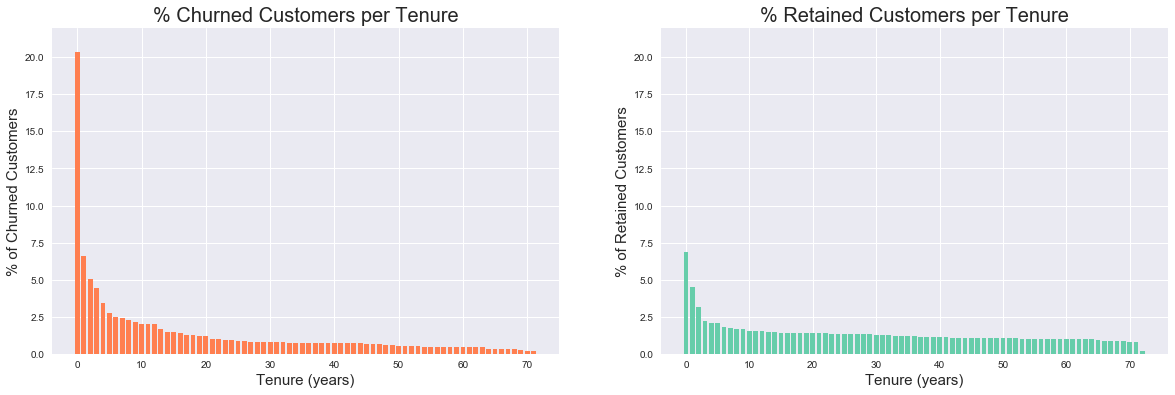

In [6]:
churned_tenure = df.loc[df.Churn_Yes==1, 'tenure'].value_counts()
retained_tenure = df.loc[df.Churn_Yes==0, 'tenure'].value_counts()

pos1 = list(range(len(churned_tenure))) 
pos2 = list(range(len(retained_tenure)))
width = 0.75

fig, ax = plt.subplots(1, 2, figsize=(20,6))

ax[0].set_title('% Churned Customers per Tenure', size=20)
ax[0].bar(pos1, churned_tenure/churned_tenure.sum()*100, width, color='coral')
ax[0].set_xlabel('Tenure (years)', size=15)
ax[0].set_ylabel('% of Churned Customers', size=15)
ax[0].set_ylim(0, 22)
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax[1].set_title('% Retained Customers per Tenure', size=20)
ax[1].bar(pos2, retained_tenure/retained_tenure.sum()*100, width, color='mediumaquamarine')
ax[1].set_xlabel('Tenure (years)', size=15)
ax[1].set_ylabel('% of Retained Customers', size=15)
ax[1].set_ylim(0, 22)
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%1.1f'))

plt.show()

# Is there a particular demographic profile or characteristics that likely leads to churn?
As we survey the histograms below comparing retained versus churned customers, several demographic conclusions can be inferred.  First, churned customers are equally male or female, with no skew toward gender.  Moving to the next chart comparing senior citizens with non-senior citizens, it appears non-senior citizens are churning the most but from a proportional view its appears that senior citizens are churning the most.  This may be natual churn of senior citizens due to their age but will require more data to confirm. 

Moving on to parter versus no partner churned customers, it seems that customers with no partners are more likely to churn.  This is likely driven by the fact that customers without partners have less financial support, and thus are more likely to churn as customers.  Lastly, moving onto to the dependents histogram, it seems that customers without dependents are likelier to churn than customers with.  This is likely tied with the no partners comparisons as customers with dependents are likely family households with partners that can provide financial support and require such services, especially Internet and streaming services for the children.  Like the previous observations, more data will require to prove out this hypothesis.

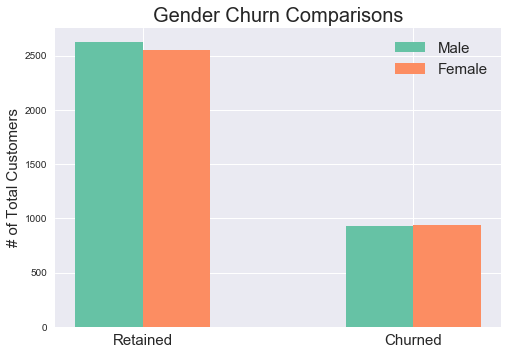

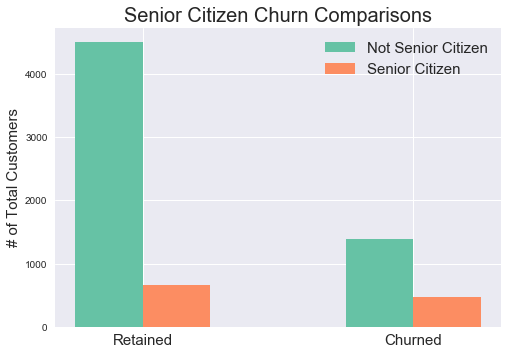

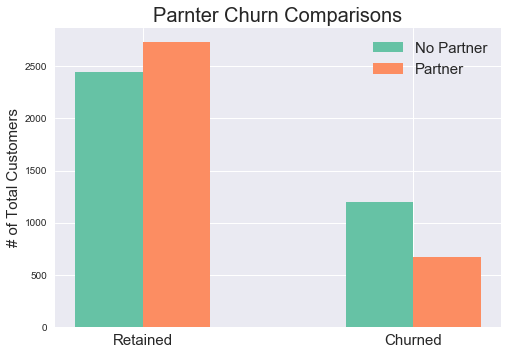

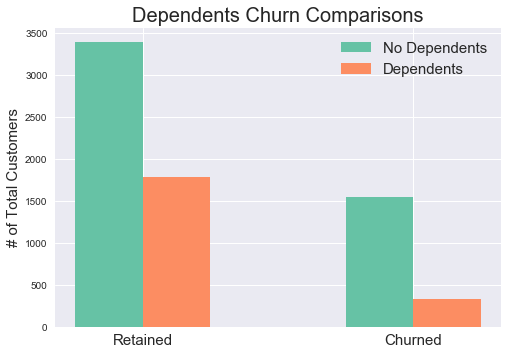

In [7]:
male_churn = df.loc[df.gender_Male==1, 'Churn_Yes']
female_churn = df.loc[df.gender_Male==0, 'Churn_Yes']
senior_churn = df.loc[df.SeniorCitizen==1, 'Churn_Yes']
not_senior_churn = df.loc[df.SeniorCitizen==0, 'Churn_Yes']
partner_churn = df.loc[df.Partner_Yes==1, 'Churn_Yes']
no_partner_churn = df.loc[df.Partner_Yes==0, 'Churn_Yes']
dependents_churn = df.loc[df.Dependents_Yes==1, 'Churn_Yes']
no_dependents_churn = df.loc[df.Dependents_Yes==0, 'Churn_Yes']

plt.hist((male_churn, female_churn), bins=np.arange(3)-0.5, rwidth=0.5, label=('Male', 'Female'))
plt.title('Gender Churn Comparisons', size=20)
plt.xticks([0, 1], ('Retained', 'Churned'), size=15)
plt.yticks(size=10)
plt.ylabel('# of Total Customers', size=15)
plt.margins(0.05)
plt.legend(fontsize=15)
plt.show()

plt.hist((not_senior_churn, senior_churn), bins=np.arange(3)-0.5, rwidth=0.5, label=('Not Senior Citizen', 'Senior Citizen'))
plt.title('Senior Citizen Churn Comparisons', size=20)
plt.xticks([0, 1], ('Retained', 'Churned'), size=15)
plt.yticks(size=10)
plt.ylabel('# of Total Customers', size=15)
plt.margins(0.05)
plt.legend(fontsize=15)
plt.show()

plt.hist((no_partner_churn, partner_churn), bins=np.arange(3)-0.5, rwidth=0.5, label=('No Partner', 'Partner'))
plt.title('Parnter Churn Comparisons', size=20)
plt.xticks([0, 1], ('Retained', 'Churned'), size=15)
plt.yticks(size=10)
plt.ylabel('# of Total Customers', size=15)
plt.margins(0.05)
plt.legend(fontsize=15)
plt.show()

plt.hist((no_dependents_churn, dependents_churn), bins=np.arange(3)-0.5, rwidth=0.5, label=('No Dependents', 'Dependents'))
plt.title('Dependents Churn Comparisons', size=20)
plt.xticks([0, 1], ('Retained', 'Churned'), size=15)
plt.yticks(size=10)
plt.ylabel('# of Total Customers', size=15)
plt.margins(0.05)
plt.legend(fontsize=15)
plt.show()